**Sprintの目的**  
- コンピュータビジョンの代表的タスクであるセグメンテーションを学ぶ

In [2]:
import tensorflow as tf
import keras

In [39]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [1]:
!pip install tensorflow==2.3.0

In [4]:
tf.__version__

'2.3.0'

In [5]:
keras.__version__

'2.4.3'

In [6]:
!python --version

Python 3.6.9


In [7]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
ls -a

./  ../  .config/  drive/  sample_data/


In [15]:
# kaggleAPIのインストール
!pip install kaggle

In [20]:
# .kaggleディレクトリの作成
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [22]:
ls -a

./  ../  .config/  drive/  .kaggle/  sample_data/


In [23]:
#kaggleと接続するための処理

# https://www.kaggle.com/　へアクセスし、ログイン後に右上のプロフィール画像をクリック、さらに"My Account"をクリックする
# このサイトの「API」項目にある"Create New API Token"をクリックすると、kaggle.jsonファイルが自動的にダウンロードされる
# ローカルで、kaggle.json（ダウンロードフォルダにあるはず）をエディターで開く。
# このセルの以下のコードにある token = {'username':'***','key':'***'} における「***」部分を、
# ダウンロードしたkaggle.jsonを参照して書き換え、このセルを実行する

import json

token = {"username":"masterplan1216","key":"adfeeab8de273ad8f0410951d6f721e9"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [25]:
!chmod 600 /content/.kaggle/kaggle.json

In [28]:
pwd

'/content'

In [29]:
ls -a .kaggle

./  ../  kaggle.json


In [31]:
mkdir　/root/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [32]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [33]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [35]:
# kaggle APIコマンドが使えるかどうかを確認
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        291           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        125           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        363           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2386           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      17953           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4744            True  
connectx

In [9]:
# カレントディレクトリの変更

import os

os.chdir('/content/drive/My Drive/')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive


In [39]:
# TGS-Saltデータセットをダウンロード
!kaggle competitions download -c tgs-salt-identification-challenge

 93% 201M/217M [00:07<00:00, 23.2MB/s]
100% 217M/217M [00:07<00:00, 31.6MB/s]
 69% 26.0M/37.9M [00:01<00:01, 7.65MB/s]
100% 37.9M/37.9M [00:01<00:00, 20.7MB/s]
  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 41.2MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 29.7MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 35.6MB/s]
 94% 153M/163M [00:06<00:00, 14.7MB/s]
100% 163M/163M [00:06<00:00, 27.2MB/s]
 80% 33.0M/41.4M [00:02<00:01, 6.26MB/s]
100% 41.4M/41.4M [00:02<00:00, 20.9MB/s]


In [42]:
#ダウンロードしたものをいれるフォルダ
mkdir TGS_Salt

mkdir: cannot create directory ‘TGS_Salt’: File exists


In [43]:
#TGS_Saltフォルダにダウンロードしたものを移動
mv competition_data.zip train.zip depths.csv train.csv sample_submission.csv test.zip flamingo.zip TGS_Salt/

In [15]:
cd TGS_Salt/

/content/drive/My Drive/TGS_Salt


In [45]:
#!unzip /content/drive/'My Drive'/TGS_Salt/train.zip -d train

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: train/images/b012e9ebb0.png  
  inflating: train/images/d3034e7a60.png  
  inflating: train/images/ae2ef70d51.png  
  inflating: train/images/1af44a9db0.png  
  inflating: train/images/41cfd4b320.png  
  inflating: train/images/853e89d0d3.png  
  inflating: train/images/2a484baa26.png  
  inflating: train/images/92e617896e.png  
  inflating: train/images/b70f0ab0c2.png  
  inflating: train/images/e8757626a1.png  
  inflating: train/images/6a3d92ce59.png  
  inflating: train/images/127ef4105f.png  
  inflating: train/images/d21012f5c1.png  
  inflating: train/images/1cb9549d2c.png  
  inflating: train/images/e030bdae65.png  
  inflating: train/images/0cf7155eb6.png  
  inflating: train/images/badb3ea766.png  
  inflating: train/images/9bd58061d6.png  
  inflating: train/images/2b1e71c2a3.png  
  inflating: train/images/28d42de29f.png  
  inflating: train/images/10833853b3.png  
  inflating: train/images/ef13247eed.png  
  inflating: train/ima

In [1]:
#!unzip /content/drive/'My Drive'/TGS_Salt/test.zip -d test

unzip:  cannot find or open /content/drive/My Drive/TGS_Salt/test.zip, /content/drive/My Drive/TGS_Salt/test.zip.zip or /content/drive/My Drive/TGS_Salt/test.zip.ZIP.


In [52]:
# UNetのgitclone
!git clone https://github.com/zhixuhao/unet.git

Cloning into 'unet'...
remote: Enumerating objects: 394, done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 394
Receiving objects: 100% (394/394), 44.92 MiB | 9.81 MiB/s, done.
Resolving deltas: 100% (79/79), done.
Checking out files: 100% (253/253), done.


データセットはgitcloneで落としたものではなく、kaggleのものを使いたいので、  
gitcloneで落としたファイルの編集が必要

1. データの位置確認
2. パスの変更（main.py）
3. data.py :87行目 %d.png → glob.glob(’*’)

In [26]:
#os.mkdir("kaggle_data")

In [12]:
#os.mkdir("predict")

In [6]:
#/content/drive/My Drive/TGS_Salt/unet/data 内にkaggleからダウンロードしたデータのコピー
#20分やっても終わらなかったのでコピーは中止

!cp -r /content/drive/"My Drive"/TGS_Salt/train /content/drive/"My Drive"/TGS_Salt/unet/data/kaggle_data
!cp -r /content/drive/"My Drive"/TGS_Salt/test /content/drive/"My Drive"/TGS_Salt/unet/data/kaggle_data

^C
^C


**【問題1】学習・推定**  
以下のKeras実装を使用して学習・推定を行ってください。


[zhixuhao/unet: unet for image segmentation](https://github.com/zhixuhao/unet)


《GPU環境での学習》


大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。


《新たなデータセットの適用》


公開されている実装で用意されたものとは異なるデータセットを入力するための準備が必要です。

In [36]:
import os

os.chdir("/content/drive/My Drive/TGS_Salt/unet")
print(os.getcwd())

/content/drive/My Drive/TGS_Salt/unet


In [38]:
!python main.py

2020-09-29 14:49:22.044574: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-29 14:49:23.322098: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-29 14:49:23.326476: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-29 14:49:23.327019: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-09-29 14:49:23.327066: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-29 14:49:23.328878: I tensorflow/stream_executor/platform/default

data.py未編集時のエラー  
FileNotFoundError: No such file: '/content/drive/My Drive/TGS_Salt/unet/data/kaggle_data/test/0.png'

上記エラーに対し、パス指定のコードを書き換えようとしたがうまくいかなかったので、ファイル名自体を0〜の連番に変更することにした。

ファイル名変更のテストを試しに5枚の画像ファイルでやってみる

In [20]:
os.chdir("/content/drive/My Drive/TGS_Salt/unet/data/kaggle_data/test/images_test")
print(os.getcwd())

/content/drive/My Drive/TGS_Salt/unet/data/kaggle_data/test/images_test


In [23]:
!ls

0a0cc52eca.png	0a1b35bb54.png	0a1b6ae0d5.png	0a1ea2ce4f.png	0a3a8a5f37.png


In [22]:
!ls ./*.png | awk "{ printf "mv %s %s.png\n", $0, NR}" | sh

awk: line 2: missing } near end of file


In [26]:
# | shを付けずにファイル名確認
!ls | awk '{ printf "mv %s %s.png\n", $0, NR-1 }'

mv 0a0cc52eca.png 0.png
mv 0a1b35bb54.png 1.png
mv 0a1b6ae0d5.png 2.png
mv 0a1ea2ce4f.png 3.png
mv 0a3a8a5f37.png 4.png


In [27]:
# | shを付けてファイル名変更
!ls | awk '{ printf "mv %s %s.png\n", $0, NR-1 }' | sh

うまくいったので実際のテストデータのファイル名を変更

In [28]:
os.chdir("/content/drive/My Drive/TGS_Salt/unet/data/kaggle_data/test/images")
print(os.getcwd())

/content/drive/My Drive/TGS_Salt/unet/data/kaggle_data/test/images


In [33]:
#テストデータのファイル名変更
!ls | awk '{ printf "mv %s %s.png\n", $0, NR-1 }' | sh

mv: '0.png' and '0.png' are the same file
^C


ファイル名変更後、上記セルでmain.pyが最後まで正常に流れ、predictが出力されたのを確認できた。

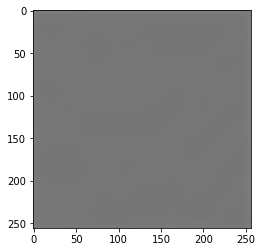

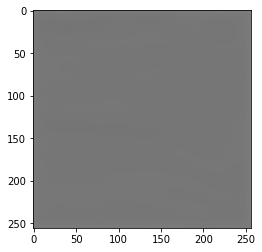

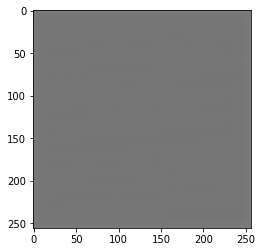

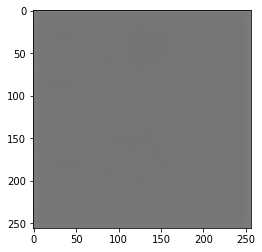

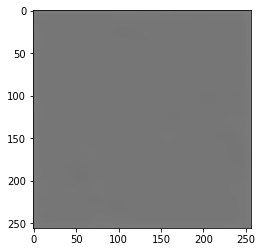

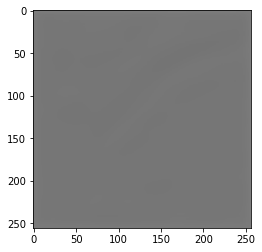

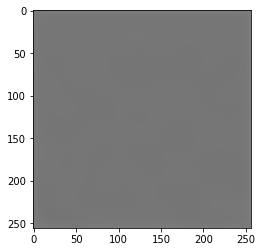

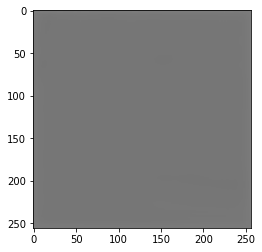

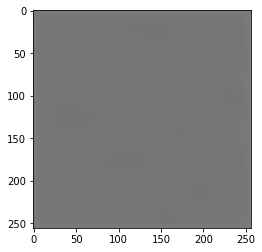

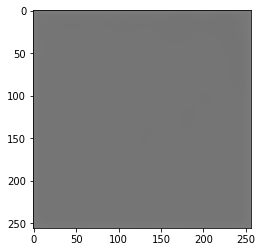

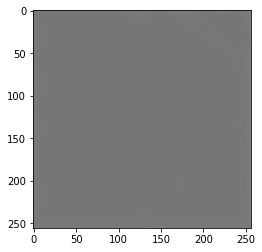

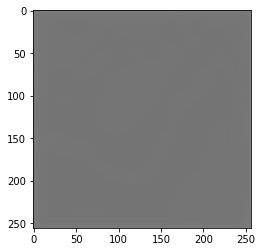

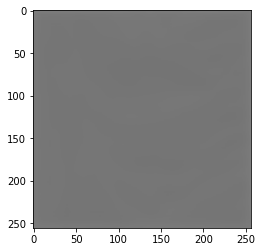

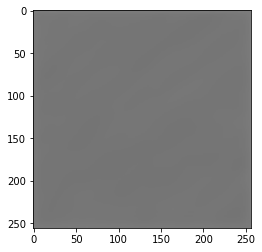

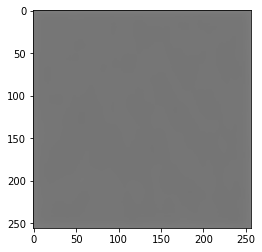

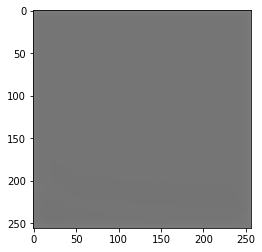

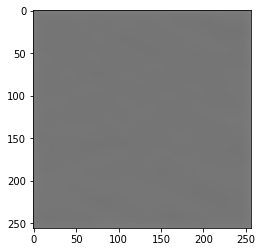

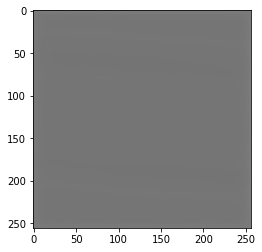

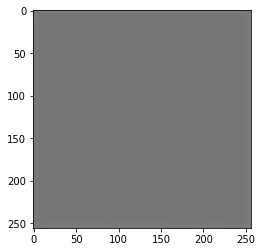

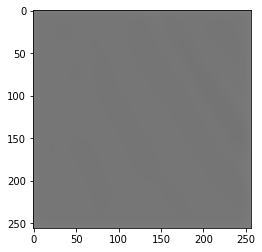

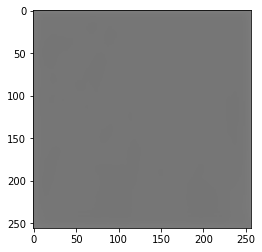

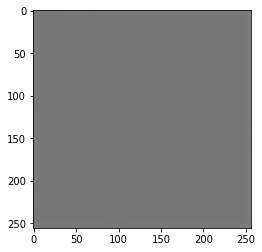

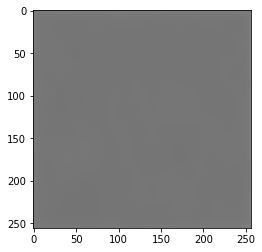

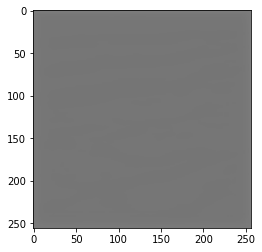

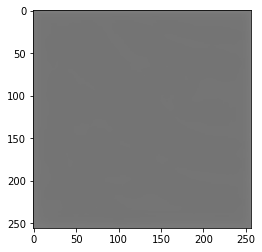

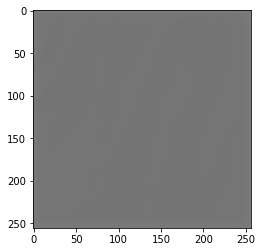

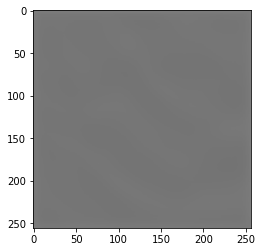

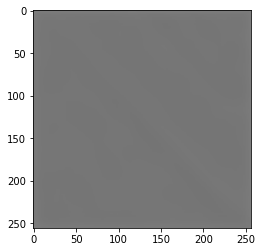

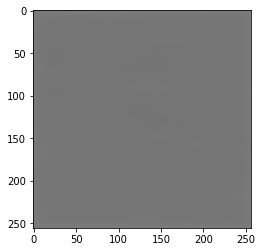

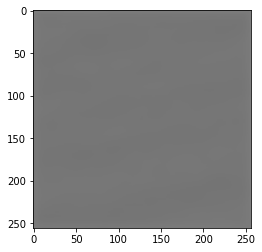

In [43]:
import matplotlib.pyplot as plt
import glob
import cv2

predict_pass = '/content/drive/My Drive/TGS_Salt/unet/data/kaggle_data/predict'
img_path_list = glob.glob(predict_pass + '/*' + ".png")

for img in img_path_list:
  img = cv2.imread(img)
  plt.imshow(img)
  plt.show()

**【問題2】コードリーディング**  
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

[https://arxiv.org/pdf/1505.04597.pdf](https://arxiv.org/pdf/1505.04597.pdf)

【論文概要】  
わずかなアノテーション付き画像、従来と比べ短いトレーニング時間で良い結果が出る

ネットワーク構造について  

【論文の和訳】  
ネットワークアーキテクチャは、 図1 。収縮経路(左側)と拡張経路(右側)で構成されています。縮小パス は、畳み込みネットワークの典型的なアーキテクチャに従います。これは、2つの3x3畳み込み(パッドなし畳 み込み)を繰り返し適用し、それぞれに正規化線形ユニット(ReLU)と、ダウンサンプリング用のストライ ド2を使用した2x2最大プーリング操作が続きます。各ダウンサンプリングステップで、フィーチャチャネルの 数を2倍にします。拡張パスのすべてのステップは、フィーチャマップのアップサンプリングと、それに続く フィーチャチャネルの数を半分にする2x2コンボリューション(「アップコンボリューション」)、縮小パス から対応してトリミングされたフィーチャマップとの連結、および2つの3x3で構成されます。畳み込み、それ ぞれにReLUが続きます。すべての畳み込みで境界ピクセルが失われるため、トリミングが必要です。最終層 では、1x1の畳み込みを使用して、各64コンポーネントの特徴ベクトルを目的の数のクラスにマッピングしま す。合計で、ネットワークには23の畳み込み層があります。

**contracting　path (left side)**

    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

2つのConv2DとMaxPooling2Dの層が繰り返されている。  
ダウンサンプリング時、チャネル数が64,128,256,...と倍になっていることがわかる。  


**expansive path (right side)**

up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

アップサンプリング（チャネル数は半分に）後、トリミングされたフィーチャマップとの連結をし、2つのConv2Dを通す構成になっている。  

最終層で、1x1の畳み込みをして、sigmoid関数を通していることがわかる。